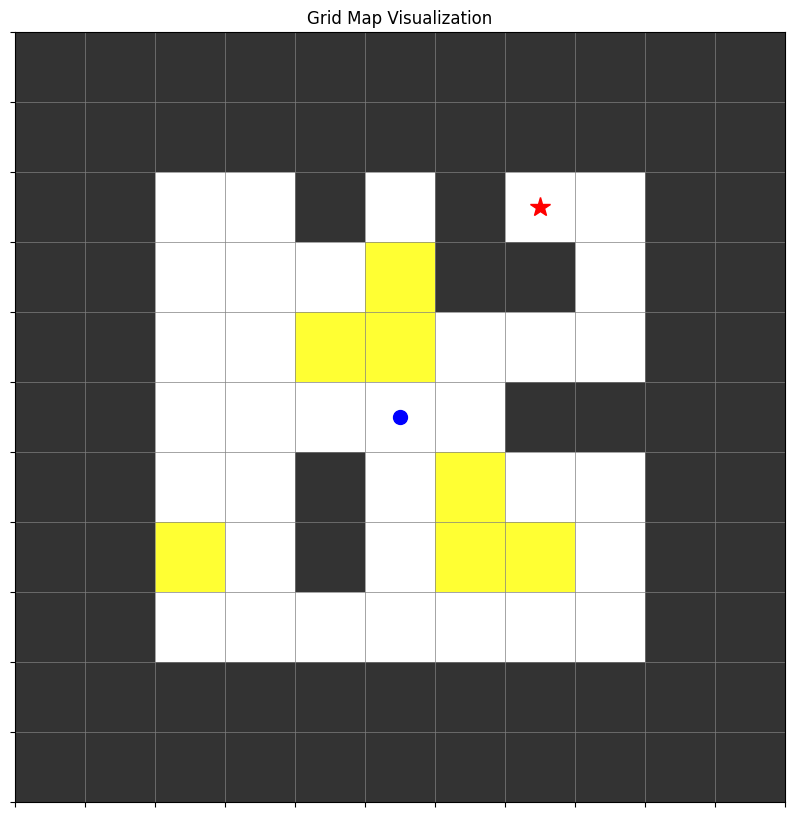

In [2]:
from environment.grid_map import GridMap
from agent import Agent
from scenarios.scenarios import ScenarioFactory
from model.policy_iteration import PolicyIteration
from lecture.gridworld_render import Renderer
import numpy as np
import time

def test_policy_iteration():
    # 1. 환경 초기화
    grid_map = GridMap(size=7, padding=2, seed=40)
    
    # 2. 벽과 공사중인 경로 추가
    grid_map.add_random_walls(num_walls=5)
    grid_map.add_random_construction(num_construction=5)
    
    # 3. 시나리오 생성 (시나리오1 사용)
    scenario = ScenarioFactory.create_scenario(
        scenario_type="시나리오1",
        grid_map=grid_map,
        agent_pos=grid_map.agent_pos
    )
    scenario.generate_goals()

    # 4. Agent 초기화
    agent = Agent(grid_map.agent_pos)
    
    # 5. Policy Iteration 초기화 및 학습
    policy_iteration = PolicyIteration(grid_map, scenario.get_goals())
    print("정책 반복 알고리즘 학습 시작...")
    start_time = time.time()
    policy_iteration.train()
    end_time = time.time()
    print(f"학습 완료! 소요 시간: {end_time - start_time:.2f}초")
    
    # 6. 학습된 정책으로 Agent 이동 테스트
    print("\n=== 학습된 정책으로 Agent 이동 테스트 ===")
    max_steps = 100
    step = 0
    
    # Renderer 초기화
    reward_map = np.zeros((grid_map.padded_size, grid_map.padded_size))
    for goal in scenario.get_goals():
        reward_map[goal] = 1.0  # 목표 지점에 보상 1.0 부여
    
    renderer = Renderer(
        reward_map=reward_map,
        goal_state=scenario.get_goals()[0],  # 첫 번째 목표 지점
        wall_state=None  # 벽은 시각화에서 별도로 처리
    )
    
    while step < max_steps:
        # 현재 상태 시각화
        renderer.render_v(v=policy_iteration.get_value_function(), policy=policy_iteration.get_policy())
        
        # 목표 도달 확인
        if agent.pos in scenario.get_goals():
            print(f"\n목표에 도달했습니다! 걸음 수: {step}")
            break
        
        # 학습된 정책에 따라 행동 선택
        action = policy_iteration.get_action(agent.pos)
        print(f"\nStep {step + 1}: {action.name} 방향으로 이동")
        
        # Agent 이동
        old_pos = agent.pos
        new_pos = agent.move(action)
        print(f"이전 위치: {old_pos}")
        print(f"새로운 위치: {new_pos}")
        
        # 같은 위치에 머무는 경우 (벽이나 공사중인 경로에 부딪힌 경우)
        if old_pos == new_pos:
            print("이동할 수 없는 위치입니다.")
        
        step += 1
        time.sleep(0.1)  # 시각화 간격 조절
    
    if step >= max_steps:
        print("\n최대 걸음 수에 도달했습니다.")

if __name__ == "__main__":
    test_policy_iteration()

In [ ]:
"""
나는 이렇게 agent가 움직일 수 있는 환경과 시나리오를 정의하였어. 나는 강화학습 프로젝트를 진행하고 있어. 시나리오에 따라 특정 목표로 움직일 수 있는 agent를 학습 시키는 게 목표야. 내 목표는 agent가 자신의 현재 상태(state)를 기준으로 움직일 곳을 판단해서 목표 지점까지 움직일 수 있도록 하는 거야. 단, 여기서 state를 정의하는 부분이 일반적인 grid world와는 차이가 있어. agent는 자신을 중심으로 5x5 크기의 주변 환경만 '볼 수 있어'. 즉, 전체 map의 정보는 모른채 목표 지점만 알고 있는 상태로, 주변 환경을 보면서 목표를 찾아서 가야하지. 그리고 시나리오에 따라 목표가 달라질 수도 있어. 시나리오1은 목표 지점 1곳을 최단시간에 찾아가야 하지. 시나리오2는 여러 목표 지점 중 가장 가까운 지점을 찾아서 가면 돼. 시나리오3은 정해진 목표 지점을 모두 도달해야 하지.
내 프로젝트의 핵심은 '시나리오에 따라 변화하는 목표를 인지하고 자신의 주변 환경을 인식한채로 목표를 수행하는 agent를 학습하는 거야.'
여기까지 내 프로제트에 대해 이해했어?
"""